# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
!pip install palmerpenguins

In [ ]:
from palmerpenguins import load_penguins
import pandas as pd

df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
penguins_df = pd.get_dummies(df)
penguins_df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
3,NaN,NaN,NaN,NaN,2007,True,False,False,False,False,True,False,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,False,True,False,False,True,False,False,True
340,43.5,18.1,202.0,3400.0,2009,False,True,False,False,True,False,True,False
341,49.6,18.2,193.0,3775.0,2009,False,True,False,False,True,False,False,True
342,50.8,19.0,210.0,4100.0,2009,False,True,False,False,True,False,False,True


In [ ]:
penguins_df.dropna().reset_index(drop = True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
3,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
4,39.3,20.6,190.0,3650.0,2007,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,55.8,19.8,207.0,4000.0,2009,False,True,False,False,True,False,False,True
338,43.5,18.1,202.0,3400.0,2009,False,True,False,False,True,False,True,False
339,49.6,18.2,193.0,3775.0,2009,False,True,False,False,True,False,False,True
340,50.8,19.0,210.0,4100.0,2009,False,True,False,False,True,False,False,True


In [ ]:
# Code Here
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer # Import SimpleImputer
from sklearn.model_selection import train_test_split # Import train_test_split

y_full = df['species']
X_full = penguins_df.drop(columns=['species_Adelie', 'species_Chinstrap', 'species_Gentoo'])

# Perform train-test split within this cell to ensure consistency
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3, random_state=42, stratify=y_full)

# define a pipeline to first impute missing values, then scale, then classify
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'), # Add imputer to handle NaNs
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=10)
)

pipeline.fit(X=X_train, y=y_train)

y_train_ = pd.Series(pipeline.predict(X_train), name = "Predicted")

pd.crosstab(y_train, y_train_, margins=True)

Predicted,Adelie,Chinstrap,Gentoo,All
species,,,,
Adelie,51,14,41,106
Gentoo,27,12,24,63
All,78,26,65,169


In [ ]:
from sklearn.metrics import confusion_matrix

y_train_ = pd.Series(pipeline.predict(X_train), name = "Predicted")

confusion_matrix(y_train, y_train_)

array([[106,   0,   0],
       [  3,  44,   0],
       [  0,   0,  87]])

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train, y_train_, average = 'macro', zero_division=0)
recall = recall_score(y_train, y_train_, average = 'macro', zero_division=0)

precision



0.9908256880733944

In [ ]:
recall

0.9787234042553191

In [ ]:
from sklearn.metrics import f1_score

# changing the predicted values back to what they were before we changed the threshold
y_train_ = pd.Series(pipeline.predict(X_train), name = "Predicted")

f1_score(y_train == 0, y_train_ == 0, average = 'macro', zero_division=0)

1.0

In [ ]:
# define a pipeline to first impute missing values, then scale, then classify
pipeline2 = make_pipeline(
    SimpleImputer(strategy='mean'), # Add imputer to handle NaNs
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=5)
)

pipeline2.fit(X=X_train, y=y_train)

y_train_ = pd.Series(pipeline2.predict(X_train), name = "Predicted")

pd.crosstab(y_train, y_train_, margins=True)

Predicted,Adelie,Chinstrap,Gentoo,All
species,,,,
Adelie,51,14,41,106
Gentoo,26,13,24,63
All,77,27,65,169


In [ ]:
y_train_ = pd.Series(pipeline2.predict(X_train), name = "Predicted")

confusion_matrix(y_train, y_train_)

array([[106,   0,   0],
       [  1,  46,   0],
       [  0,   0,  87]])

In [ ]:
precision2 = precision_score(y_train, y_train_, average = 'macro', zero_division=0)
recall2 = recall_score(y_train, y_train_, average = 'macro', zero_division=0)

precision2


0.9968847352024922

In [ ]:
recall2

0.9929078014184397

In [ ]:
y_train_ = pd.Series(pipeline2.predict(X_train), name = "Predicted")

f1_score(y_train == 0, y_train_ == 0, average = 'macro', zero_division=0)

1.0

In [ ]:
# define a pipeline to first impute missing values, then scale, then classify
pipeline3 = make_pipeline(
    SimpleImputer(strategy='mean'), # Add imputer to handle NaNs
    StandardScaler(),
    DecisionTreeClassifier(max_depth=5)
)

pipeline3.fit(X=X_train, y=y_train)

y_train_ = pd.Series(pipeline3.predict(X_train), name = "Predicted")

In [ ]:
y_train_ = pd.Series(pipeline3.predict(X_train), name = "Predicted")

confusion_matrix(y_train, y_train_)

array([[106,   0,   0],
       [  0,  47,   0],
       [  0,   0,  87]])

In [ ]:
precision3 = precision_score(y_train, y_train_, average = 'macro', zero_division=0)
recall3 = recall_score(y_train, y_train_, average = 'macro', zero_division=0)

precision3

1.0

In [ ]:
recall3

1.0

In [ ]:
y_train_ = pd.Series(pipeline3.predict(X_train), name = "Predicted")

f1_score(y_train == 0, y_train_ == 0, average = 'macro', zero_division=0)

1.0

In [ ]:
pipeline4 = make_pipeline(
    SimpleImputer(strategy='mean'), # Add imputer to handle NaNs
    StandardScaler(),
    DecisionTreeClassifier(max_depth=10)
)

pipeline4.fit(X=X_train, y=y_train)

y_train_ = pd.Series(pipeline4.predict(X_train), name = "Predicted")

In [ ]:
y_train_ = pd.Series(pipeline4.predict(X_train), name = "Predicted")

confusion_matrix(y_train, y_train_)

array([[106,   0,   0],
       [  0,  47,   0],
       [  0,   0,  87]])

In [ ]:
precision4 = precision_score(y_train, y_train_, average = 'macro', zero_division=0)
recall4 = recall_score(y_train, y_train_, average = 'macro', zero_division=0)

precision4

1.0

In [ ]:
recall4

1.0

In [ ]:
y_train_ = pd.Series(pipeline4.predict(X_train), name = "Predicted")

f1_score(y_train == 0, y_train_ == 0, average = 'macro', zero_division=0)

1.0

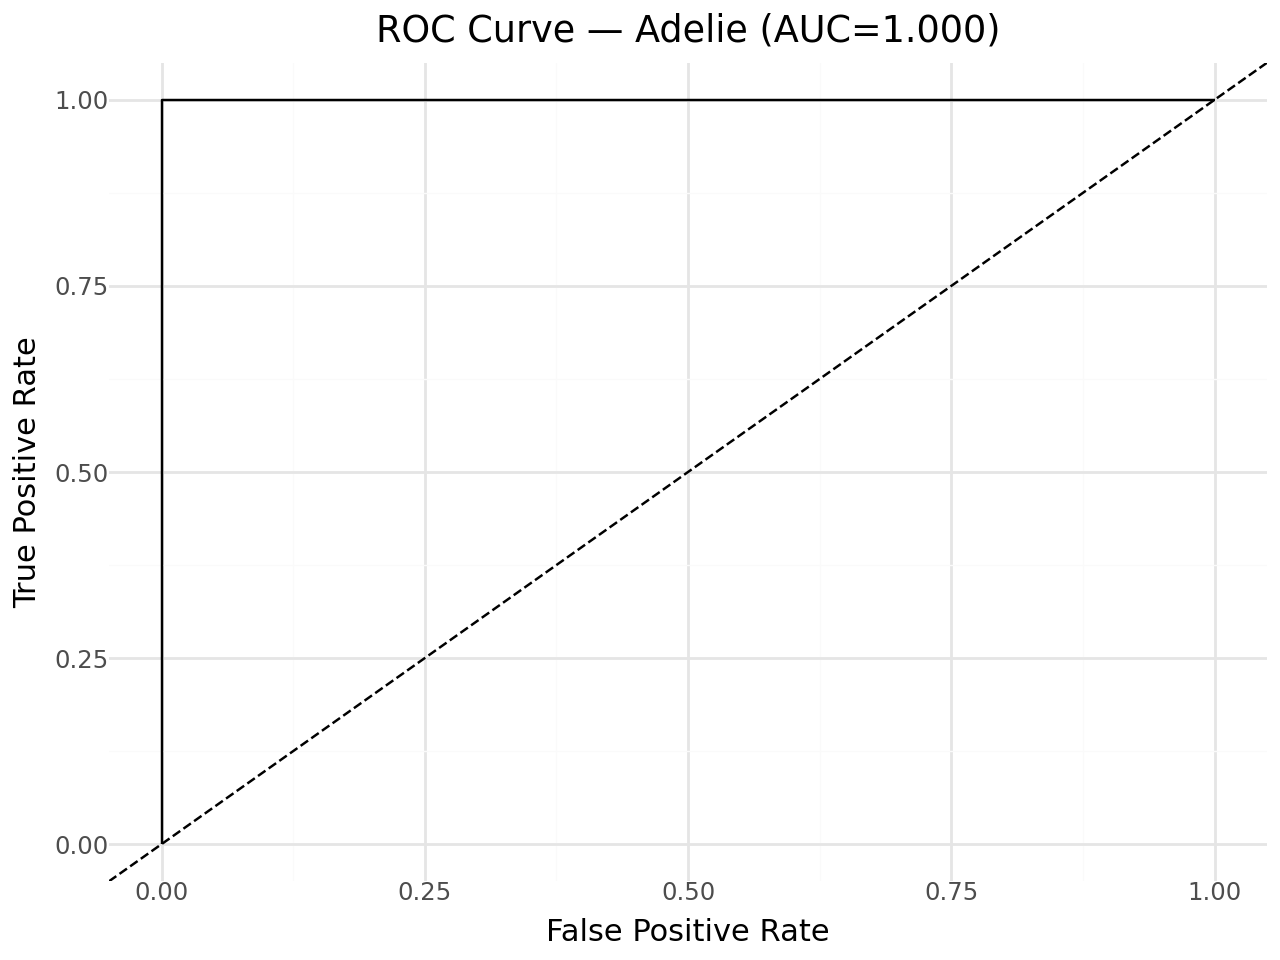

In [44]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from plotnine import *

positive_class = "Adelie"

y_proba = pipeline.predict_proba(X_train)
class_idx = np.where(pipeline.classes_ == positive_class)[0][0]
y_score = y_proba[:, class_idx]

# Binarize ground truth for OvR ROC
y_true = (y_train == positive_class).astype(int).values

# ROC + AUC
fpr, tpr, _ = roc_curve(y_true, y_score)
auc_val = roc_auc_score(y_true, y_score)

roc_df = pd.DataFrame({"FPR": fpr, "TPR": tpr})

roc_plot = (
    ggplot(roc_df, aes(x="FPR", y="TPR"))
    + geom_line()
    + geom_abline(slope=1, intercept=0, linetype="dashed")
    + theme_minimal()
    + labs(x="False Positive Rate", y="True Positive Rate")
    + ggtitle(f"ROC Curve — {positive_class} (AUC={auc_val:.3f})")
)

roc_plot